## Laboratorio 3
Stefano Aragoni, Carol Arevalo


-------
### Análisis Exploratorio:
- Describir las series de tiempo y visualizarlas

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
from darts import TimeSeries
from IPython.display import display
import warnings
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import itertools
import statsmodels.api as sm

Como primer paso, se importaron los diferentes datasets y se les asignó un nombre para poder trabajar con ellos. Se utilizó la función `read_csv` de la librería `pandas` para leer los archivos csv y convertirlos en dataframes.

In [144]:
# Cargar los datos
births = pd.read_csv("data/daily-total-female-births.csv", delimiter=",")
car = pd.read_csv("data/monthly-car-sales.csv", delimiter=",")
temperature = pd.read_csv("data/monthly-mean-temp.csv", delimiter=",")
shampoo = pd.read_csv('data/shampoo.csv', delimiter=",")

metrics = {}

Posteriormente, se utilizó la librería `MinMaxScaler` para normalizar los datos de cada dataset. Esto se hizo para poder comparar las series de tiempo de manera más sencilla.

In [145]:
scaler = MinMaxScaler()
scaler.fit(births[['Births']])
births['Births'] = scaler.transform(births[['Births']])+0.1

scaler = MinMaxScaler()
scaler.fit(car[['Sales']])
car['Sales'] = scaler.transform(car[['Sales']])+0.1

scaler = MinMaxScaler()
scaler.fit(temperature[['Temperature']])
temperature['Temperature'] = scaler.transform(temperature[['Temperature']])+0.1

scaler = MinMaxScaler()
scaler.fit(shampoo[['Sales']])
shampoo['Sales'] = scaler.transform(shampoo[['Sales']])+0.1

Posteriormente, quiso analizar el contenido de los diferentes datasets. A continuación se presentan las 15 primeras columnas de cada uno de ellos. 

- Como se puede observar, el dataset de *shampoo* usa un formato de fecha diferente. Donde el año es representado por un número de un digito. Como resultado, se debe cambiar el formato de la fecha para poder trabajar con ella.

In [146]:
pd.concat([births.head(15), car.head(15), temperature.head(15), shampoo.head(15)], axis=1)

,Date,Births,Month,Sales,Month,Temperature,Month,Sales
0,1959-01-01,0.34,1960-01,0.147830,1920-01,0.364205,1-01,0.360707
1,1959-01-02,0.28,1960-02,0.253914,1920-02,0.369886,1-02,0.147272
2,1959-01-03,0.24,1960-03,0.414549,1920-03,0.472159,1-03,0.213382
3,1959-01-04,0.26,1960-04,0.529935,1920-04,0.537500,1-04,0.100000
4,1959-01-05,0.52,1960-05,0.539287,1920-05,0.747727,1-05,0.208406
5,1959-01-06,0.22,1960-06,0.500516,1920-06,0.872727,1-06,0.187436
6,1959-01-07,0.54,1960-07,0.291418,1920-07,0.850000,1-07,0.299929
7,1959-01-08,0.50,1960-08,0.230680,1920-08,0.813068,1-08,0.286956
8,1959-01-09,0.40,1960-09,0.172135,1920-09,0.753409,1-09,0.230620
9,1959-01-10,0.18,1960-10,0.293707,1920-10,0.645455,1-10,0.106398


Para solucionar este problema, se cambio el formato de la fecha a un formato de fecha estándar. Para esto, se utilizó la función `apply` de la librería `pandas` para aplicar una función a cada elemento de la columna. En este caso, se utilizó la función `lambda` para aplicar modificar el contenido de cada elemento de la columna.

In [147]:
# Convertir month de shampoo a fecha
shampoo['Month'] = shampoo['Month'].apply(lambda x: ("200"+x.split('-')[0]) + '-' + x.split('-')[1])

shampoo.head(5)

,Month,Sales
0,2001-01,0.360707
1,2001-02,0.147272
2,2001-03,0.213382
3,2001-04,0.100000
4,2001-05,0.208406


Posteriormente, se graficaron las series de tiempo para poder visualizarlas. Para esto, se utilizó la función `plot` de la librería `matplotlib`.

In [148]:
# Cargar la serie de tiempo
ts_births = TimeSeries.from_dataframe(births, 'Date', 'Births')
ts_car = TimeSeries.from_dataframe(car, 'Month', 'Sales')
ts_temperature = TimeSeries.from_dataframe(temperature, 'Month', 'Temperature')
ts_shampoo = TimeSeries.from_dataframe(shampoo, 'Month', 'Sales')

En el caso de la serie de tiempo de nacimientos totales diarios, se puede observar lo siguiente:
- Esta serie de tiempo hace referencia a los nacimientos diarios totales. Claramente, cada punto de la serie de tiempo hace referencia a un día. Por tal razón, se puede decir que la frecuencia de la serie de tiempo es diaria.

- La serie de tiempo tiene una tendencia relativamente estable. Sin embargo, en este caso solo se está analizando un único año, por tal razón, no se puede indicar con mayor precisión si a largo plazo hay un aumento en los nacimientos. 

- En el caso de estacionalidad, no se puede observar un patrón claro de estacionalidad.

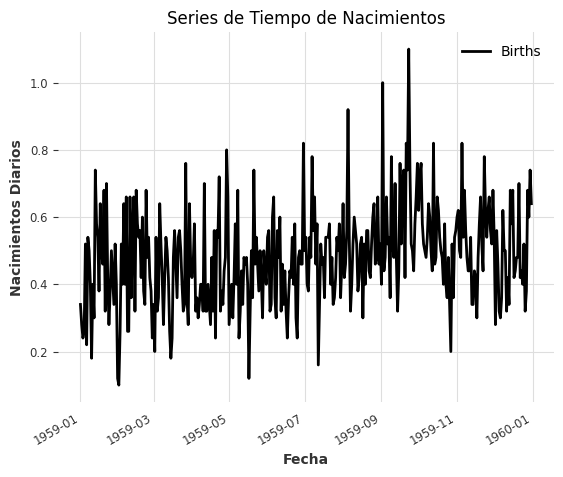

In [149]:
# Graficar la serie de tiempo
fig, ax = plt.subplots()
ts_births.plot(ax=ax)

ax.set_title("Series de Tiempo de Nacimientos")
ax.set_xlabel("Fecha")
ax.set_ylabel("Nacimientos Diarios")
plt.show()

En el caso de la serie de tiempo de ventas de carros mensuales, se puede observar lo siguiente:
- Esta serie de tiempo hace referencia a las ventas mensuales de carros. Claramente, cada punto de la serie de tiempo hace referencia a un mes. Por tal razón, se puede decir que la frecuencia de la serie de tiempo es mensual.

- La serie de tiempo tiene una tendencia ascendente. A pesar de que hay sube y baja en las ventas, se puede observar que a largo plazo hay un aumento en las ventas de carros. Esto debido a que, claramente, cada vez hay más carros en las calles.

- En el caso de estacionalidad, se puede observar que la primera mitad del año hay un aumento en las ventas de carros seguido de un descenso en las ventas de carros. Sin embargo, en la segunda mitad del año, específicamente a principios del 3r trimestre, se puede observar un aumento en las ventas de carros.

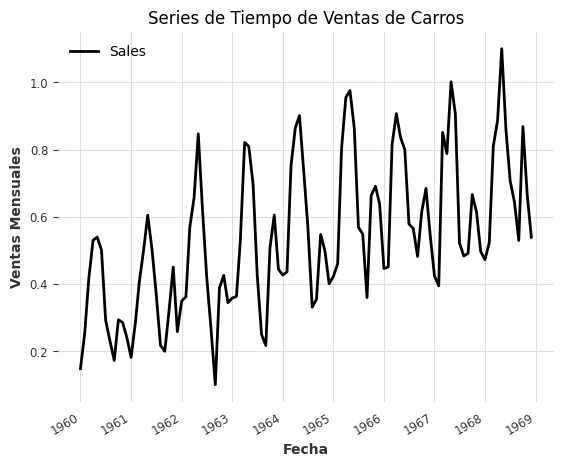

In [150]:
# Graficar la serie de tiempo
fig, ax = plt.subplots()
ts_car.plot(ax=ax)

ax.set_title("Series de Tiempo de Ventas de Carros")
ax.set_xlabel("Fecha")
ax.set_ylabel("Ventas Mensuales")
plt.show()

En el caso de la serie de tiempo de  temperaturas promedio mensuales, se puede observar lo siguiente:
- Esta serie de tiempo hace referencia a las temperaturas promedio mensuales. Claramente, cada punto de la serie de tiempo hace referencia a un mes. Por tal razón, se puede decir que la frecuencia de la serie de tiempo es mensual. 

- La serie de tiempo no tiene tendencia. Es decir, que de los años 1920 a 1940 no hay un cambio significativo en la temperatura promedio. 

- En el caso de estacionalidad, se puede observar que hay un aumento en la temperatura promedio en los meses de verano y un descenso en los meses de invierno. Este representando un patrón, el más obvio incluso, de estacionalidad. 

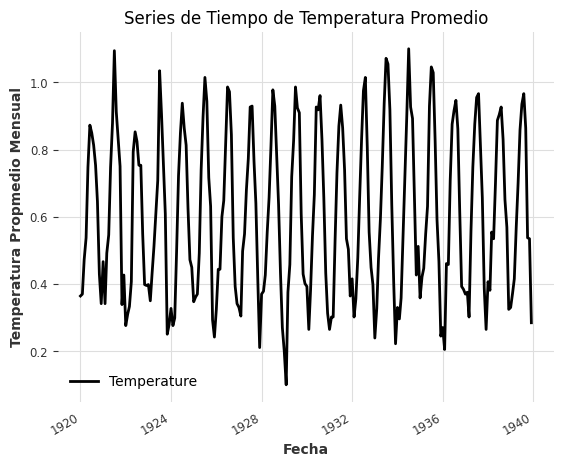

In [151]:
# Graficar la serie de tiempo
fig, ax = plt.subplots()
ts_temperature.plot(ax=ax)

ax.set_title("Series de Tiempo de Temperatura Promedio")
ax.set_xlabel("Fecha")
ax.set_ylabel("Temperatura Propmedio Mensual")
plt.show()

En el caso de la serie de tiempo de ventas de shampoo mensuales, se puede observar lo siguiente:
- Esta serie de tiempo hace referencia a las ventas mensuales de shampoo. Claramente, cada punto de la serie de tiempo hace referencia a un mes. Por tal razón, se puede decir que la frecuencia de la serie de tiempo es mensual.

- La serie de tiempo tiene una tendencia ascendente. Esto debido a que se puede observar que hay un aumento en las ventas de shampoo a lo largo del tiempo.

- En el caso de estacionalidad, no se puede observar un patrón claro de estacionalidad. Sin embargo, se puede observar que en ciertos meses (alrededor de septiembre) hay un aumento en las ventas de shampoo.

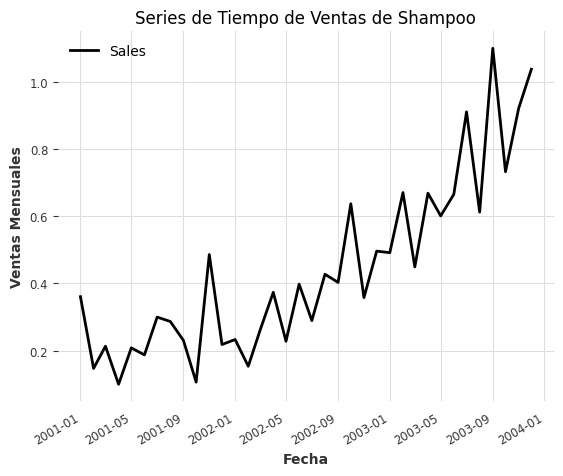

In [152]:
# Graficar la serie de tiempo
fig, ax = plt.subplots()
ts_shampoo.plot(ax=ax)

ax.set_title("Series de Tiempo de Ventas de Shampoo")
ax.set_xlabel("Fecha")
ax.set_ylabel("Ventas Mensuales")
plt.show()

-------
### Promedios
- Aplicar métodos de promedios y comparar los resultados con el conjunto original

Como primer punto, se generó una función para aplicar los métodos de promedios (Naive Moving Average, y Naive Mean). Se calculó el error de cada una de las predicciones. 

Naive Mean: This model has no parameter, and always predicts the mean value of the training series.

Naive Drift: This model fits a line between the first and last point of the training series, and extends it in the future.

In [153]:
from darts.models import NaiveMovingAverage, NaiveMean
from darts.metrics import rmse, mae, mape

def promedios(ts, text, N=0):
    N = int(len(ts)*0.1)
    train, val = ts[:-N], ts[-N:]
    
    metrics[text] = {}

    # Crear el modelo NaiveMovingAverage
    model = NaiveMovingAverage()
    model.fit(train)
    prediction = model.predict(len(val)) 

    # Crear el modelo NaiveMean
    model2 = NaiveMean()
    model2.fit(train)
    prediction2 = model2.predict(len(val))

    # Error 
    rmse_score = rmse(val, prediction)
    mae_score = mae(val, prediction)
    print("RMSE (NaiveMovingAverage):", rmse_score)
    print("MAE (NaiveMovingAverage):", mae_score)
    metrics[text]["NaiveMovingAverage"] = [rmse_score, mae_score]

    rmse_score2 = rmse(val, prediction2)
    mae_score2 = mae(val, prediction2)
    print("\nRMSE (NaiveMean):", rmse_score2)
    print("MAE (NaiveMean):", mae_score2)
    metrics[text]["NaiveMean"] = [rmse_score2, mae_score2]

    # Crear la gráfica de serie de tiempo
    fig, ax = plt.subplots()
    ts.plot(label='Actual', ax=ax)
    prediction.plot(label='NaiveMovingAverage', ax=ax)
    prediction2.plot(label='NaiveMean', ax=ax)

    ax.set_title(text)
    ax.set_xlabel("Fecha")
    ax.legend()
    plt.show()


En el caso de la serie de tiempo de nacimientos totales diarios, se puede observar lo siguiente:

- Las métricas de RMSE y MAE indican que el método de NaiveMean es mejor que el método de  NaiveMovingAverage. Sin embargo, ambos métodos presentaron errores muy similares. 

- Este tipo de método es útil cuando se quiere predecir un valor en el futuro cercano. Sin embargo, no es útil cuando se quiere predecir un valor en el futuro lejano. Esto debido a que, como se puede observar en la gráfica, los métodos predicen un valor constante para todos los valores futuros.

RMSE (NaiveMovingAverage): 0.1349897115421106
MAE (NaiveMovingAverage): 0.11555555555555556

RMSE (NaiveMean): 0.13310423680539482
MAE (NaiveMean): 0.11273893954745016


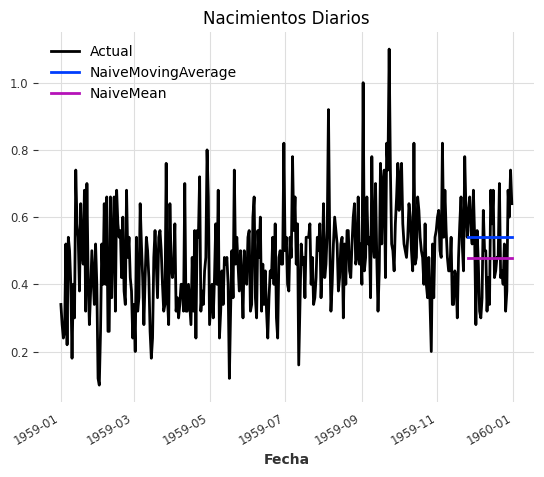

In [154]:
promedios(ts_births, "Nacimientos Diarios")

En el caso de la serie de tiempo de ventas de carros, se puede observar lo siguiente:
- El NaiveMovingAverage, debido a su funcionamiento, predice en base al promedio de los últimos valores. Por otro lado, el NaiveMean predice en base al promedio de todos los datos históricos. 

- En este caso, ambos tienen un error muy similar. Sin embargo, el NaiveMovingAverage tiene un error menor. debido a que se acopla más a la tendencia ascendente de la serie.

- Nuevamente, este tipo de método retorna una serie de predicciones constantes. Por lo que, no es útil cuando se quiere predecir un valor en el futuro lejano.

RMSE (NaiveMovingAverage): 0.290988637419809
MAE (NaiveMovingAverage): 0.23752861526472172

RMSE (NaiveMean): 0.2957147242044674
MAE (NaiveMean): 0.2432954049575604


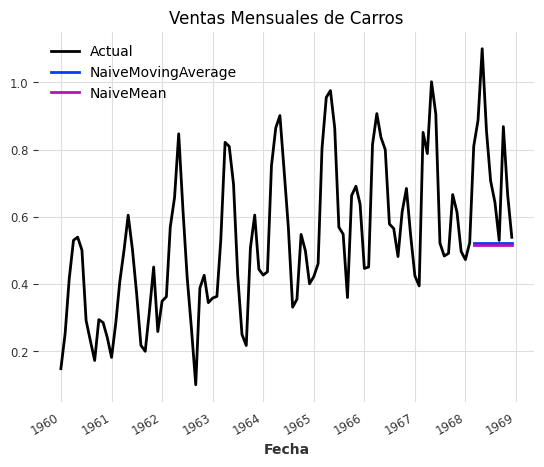

In [155]:
promedios(ts_car, "Ventas Mensuales de Carros")

En el caso de la serie de tiempo de temperatura promedio mensual, se puede observar lo siguiente:
- El NaiveMean sacó un error promedio más bajo de RMSE y MAE. El presente dataset no presenta tendencia, por lo cual los datos son estables. Como resultado, el NaiveMean logró predecir los futuros valores justo a la mitad.

- El modelo NaiveMovingAverage toma en consideración los últimos datos históricos. Ya que en este caso aparentemente hay más valores bajos que altos, el modelo predice valores bajos para todo el futuro.

RMSE (NaiveMovingAverage): 0.4232533472548865
MAE (NaiveMovingAverage): 0.36174242424242414

RMSE (NaiveMean): 0.22115819224294614
MAE (NaiveMean): 0.19212414948092027


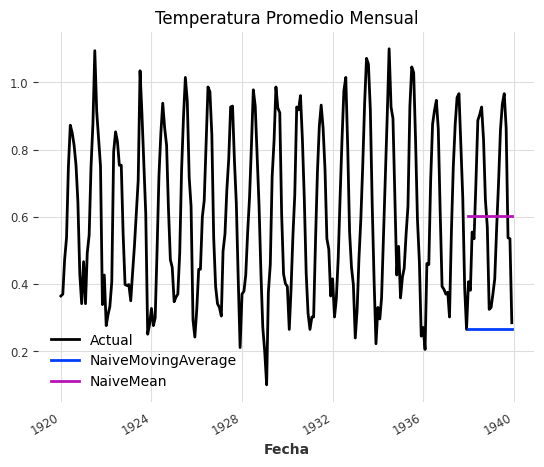

In [156]:
promedios(ts_temperature, "Temperatura Promedio Mensual")

En el caso de las ventas mensuales de shampoo, se puede observar lo siguiente:
- Debido a que el dataset presenta una tendencia ascendente, el método de Naive Mean no funcionó adecuadamente. Nuevamente, este método promedia todos los valores históricos, por lo cual no es capaz de seguir la última tendencia de los datos. 

- NaiveMovingAverage presentó muchísimo menos error debido a que sí fue capaz de detectar el último patrón y continuar con esa tendencia.

RMSE (NaiveMovingAverage): 0.23864405162647753
MAE (NaiveMovingAverage): 0.20289082400331748

RMSE (NaiveMean): 0.5105243884688203
MAE (NaiveMean): 0.49482204307155436


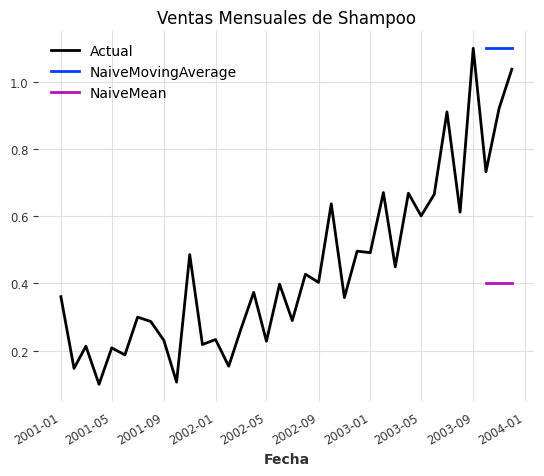

In [157]:
promedios(ts_shampoo, "Ventas Mensuales de Shampoo")

------
### SARIMA
- Identificar parámetros y ajustar un modelo SARIMA

Posteriormente, se generó una función para aplicar el método de SARIMA. Se calculó el error de cada una de las predicciones. 

In [158]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

def sarima(ts, text, N=0, fre=12):
    N = int(len(ts)*0.10)
    train, val = ts[:-N], ts[-N:]

    # GridSearch CV
    p_values = [0, 1, 2]
    d_values = [0, 1]
    q_values = [0, 1]
    P_values = [0, 1]
    D_values = [0, 1]
    Q_values = [0, 1]
    s_values = [fre]

    warnings.filterwarnings("ignore")   # Ignora warnings de convervengia de GridSearch
    param_combinations = list(itertools.product(p_values, d_values, q_values, P_values, D_values, Q_values, s_values))
    best_params = None
    best_aic = np.inf

    # GRID SEARCH PARA BUSCAR MEJORES PARAMETROS
    for params in param_combinations:
        p, d, q, P, D, Q, s = params
        
        try:
            sarima_model = sm.tsa.SARIMAX(train.values(), order=(p, d, q), seasonal_order=(P, D, Q, s), enforce_stationarity=False, enforce_invertibility=False)
            sarima_results = sarima_model.fit(disp=False, maxiter=100)
            
            aic = sarima_results.aic
            
            if aic < best_aic:
                best_aic = aic
                best_params = params
                
        except Exception as e:
            continue
    
    # Ajustar el modelo SARIMA con los mejores parámetros encontrados
    model_sarima = SARIMAX(train.values(), order=(best_params[0], best_params[1], best_params[2]), seasonal_order=(best_params[3], best_params[4], best_params[5], best_params[6]))
    model_sarima = model_sarima.fit(disp=False, maxiter=100)

    # Predecir los valores
    prediction = model_sarima.forecast(steps=len(val))

    # Calcular RMSE y MAE
    rmse_val = np.sqrt(np.mean((val.values() - prediction) ** 2))
    mae_val = np.mean(np.abs(val.values() - prediction))
    print('RMSE = {:.2f}'.format(rmse_val))
    print('MAE = {:.2f}'.format(mae_val))

    metrics[text]["Sarima"] = [rmse_val, mae_val]

    # Crear la gráfica de serie de tiempo
    fig, ax = plt.subplots()
    ts.plot(label='actual', ax=ax)
    ax.plot(val.time_index, prediction, label='forecast', color='orange')

    ax.set_title(text)
    ax.set_xlabel("Fecha")
    ax.set_ylabel("Valor")
    ax.legend()
    plt.show()

En el caso de SARIMA con daily-total-female-births, se puede observar lo sigueinte:

- A través de GRID SEARCH, se logró encontrar los parámetros y ajustes que generaban el mejor modelo.

- Este dataset no presenta tendencia ni estacionalidad, por lo cual SARIMA (Seasonal Autoregressive Integrated Moving Average) no presenta gran ventaja para predecir valores. En realidad, generó un error similar a los métodos de promedios. 

RMSE = 0.13
MAE = 0.11


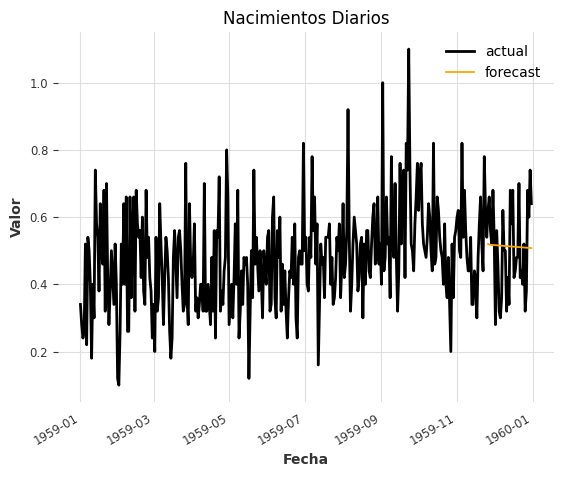

In [159]:
sarima(ts_births, "Nacimientos Diarios", 0)

En el caso de SARIMA con ventas mensuales de carros, se puede observar lo sigueinte:

- A través de GRID SEARCH, se logró encontrar los parámetros y ajustes que generaban el mejor modelo.

- Como se puede observar en la gráfica, este método presentó predicciones que más se acoplan a los valores reales. Sin embargo, cabe destacar que no se termina de acoplar 100% debido a patrones raros que pudo haber encontrado. Este método no es muy flexible.

RMSE = 0.24
MAE = 0.19


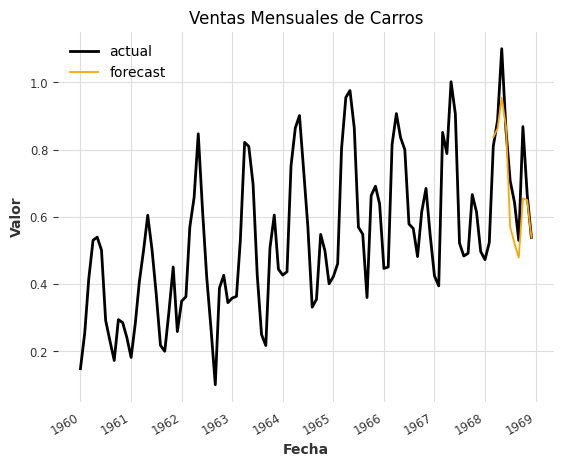

In [160]:
sarima(ts_car, "Ventas Mensuales de Carros", 12)

En el caso de SARIMA con las temperaturas promedio mensuales, se puede observar lo sigueinte:

- A través de GRID SEARCH, se logró encontrar los parámetros y ajustes que generaban el mejor modelo.

- Las predicciones generadas con el método de SARIMA se apegaron al patrón de la serie de tiempo original. Asimismo, presentó un error menor que con el método de Naive Moving Average, donde se tenía un RMSE de 0.42 y un MAE de 0.36.

- Este dataset funcionó mejor con SARIMA ya que presenta estacionalidad; elemento clave para usar SARIMA. Asimismo, ya que no presenta tendencia positiva ni negativa, fue más fácil para el modelo. 

RMSE = 0.33
MAE = 0.27


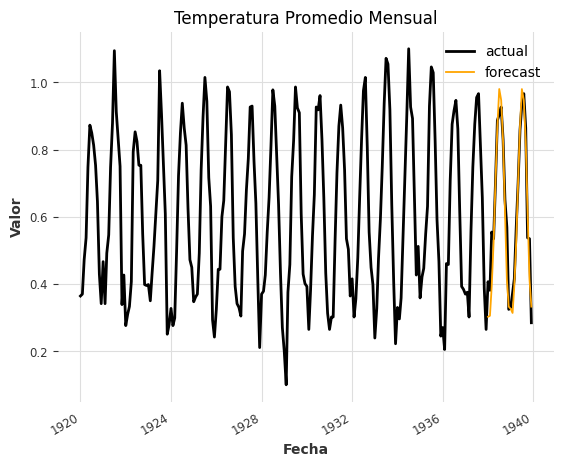

In [161]:
sarima(ts_temperature, "Temperatura Promedio Mensual", 12)

En el caso de SARIMA con las ventas mensuales de shampoo, se puede observar lo sigueinte:

- A través de GRID SEARCH, se logró encontrar los parámetros y ajustes que generaban el mejor modelo.

- El método de SARIMA generó error más bajo que con Naive Moving Average y Naive Mean. El modelo aparentemente encontró un tipo de patrón, por lo cual quería bajar inmediatamente al final. Sin embargo, este no era el patrón real de la serie de tiempo.

RMSE = 0.19
MAE = 0.16


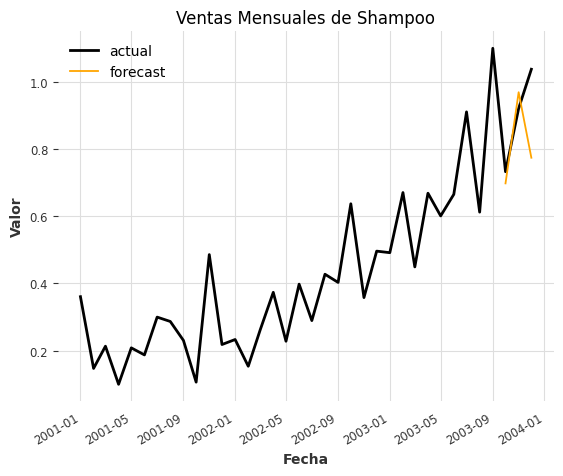

In [162]:
sarima(ts_shampoo, "Ventas Mensuales de Shampoo", 0)

-------
### Alisamiento Exponencial:
- Aplicar diferentes métodos de alisamiento exponencial y comparar.

Posteriormente, se generó una función para aplicar diferentes métodos de alisamiento exponencial (Single, y Holt-Winters). Se calculó el error de cada una de las predicciones. 

In [163]:
from darts.models import ExponentialSmoothing
from darts.utils.utils import ModelMode, SeasonalityMode

def exponencial(ts, text, N=0):
    N = int(len(ts)*0.1)
    train, val = ts[:-N], ts[-N:]

    # Crear el modelo SIMPLE EXPONENTIAL SMOOTHING
    model = ExponentialSmoothing(
        trend= None,                    # NO hay tendencia
        seasonal=None,                  # No hay estacionalidad
    )
    model.fit(train)
    prediction = model.predict(len(val)) 

    # Crear el modelo HOLT WINTERS EXPONENTIAL SMOOTHING
    model2 = ExponentialSmoothing(
        trend= ModelMode.ADDITIVE,                  # Sí hay tendencia
        seasonal=SeasonalityMode.ADDITIVE           # Sí hay estacionalidad
        #seasonal_periods                           # Inferido automáticamente
    )
    model2.fit(train)
    prediction2 = model2.predict(len(val))

    # Error 
    rmse_score = rmse(val, prediction)
    mae_score = mae(val, prediction)
    print("RMSE (SingleExponentialSmoothing):", rmse_score)
    print("MAE (SingleExponentialSmoothing):", mae_score)
    metrics[text]["SingleExponentialSmoothing"] = [rmse_score, mae_score]

    rmse_score2 = rmse(val, prediction2)
    mae_score2 = mae(val, prediction2)
    print("\nRMSE (HoltWintersExponentialSmoothing):", rmse_score2)
    print("MAE (HoltWintersExponentialSmoothing):", mae_score2)
    metrics[text]["HoltWintersExponentialSmoothing"] = [rmse_score2, mae_score2]

    # Crear la gráfica de serie de tiempo
    fig, ax = plt.subplots()
    ts.plot(label='Actual', ax=ax)
    prediction.plot(label='SingleExponentialSmoothing', ax=ax)
    prediction2.plot(label='HoltWintersExponentialSmoothing', ax=ax)

    ax.set_title(text)
    ax.set_xlabel("Fecha")
    ax.set_ylabel("Valor")
    ax.legend()
    plt.show()

Con Alisamiento Exponencial se pudo observar lo siguiente:
- Ya que el conjunto de datos de Nacimientos Diarios no presenta tendencia ni estacionalidad, Holt Winters Exponential Smoothing no fue capaz de predecir con bajo error los valores futuros. Es más, el error es similar al de Single Exponential Smoothing.

- Cabe destacar que este modelo sacó resultados similares a los métodos de promedio.

RMSE (SingleExponentialSmoothing): 0.1315721348249778
MAE (SingleExponentialSmoothing): 0.11276190769237188

RMSE (HoltWintersExponentialSmoothing): 0.13239375048125773
MAE (HoltWintersExponentialSmoothing): 0.11195374164051902


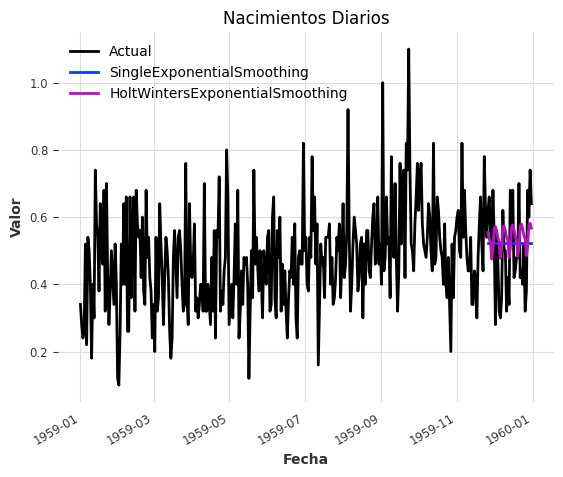

In [164]:
exponencial(ts_births, "Nacimientos Diarios")

Con Alisamiento Exponencial se pudo observar lo siguiente:
- El dataset de Ventas Mensuales de Carros sí presenta una tendencia positiva y estacionalidad (ventas más altas en la primera mitad de un año). Como resultado, el algoritmo de Holt Winters fue capaz de correctamente predecir los respectivos valores. En este caso, con un error casi nulo (0.09 de RMSE y 0.07 de MAE). Este método obtuvo el error más bajo para este dataset hasta el momento.

- En el caso de Single Exponential Smoothing, este no presentó tan buenos resultados debido a que el dataset presenta una tendencia y estacionalidad. Esta versión del método no funciona muy bien con estas características. 

RMSE (SingleExponentialSmoothing): 0.290988638036547
MAE (SingleExponentialSmoothing): 0.23752861602026742

RMSE (HoltWintersExponentialSmoothing): 0.09426604367912826
MAE (HoltWintersExponentialSmoothing): 0.07154058211373863


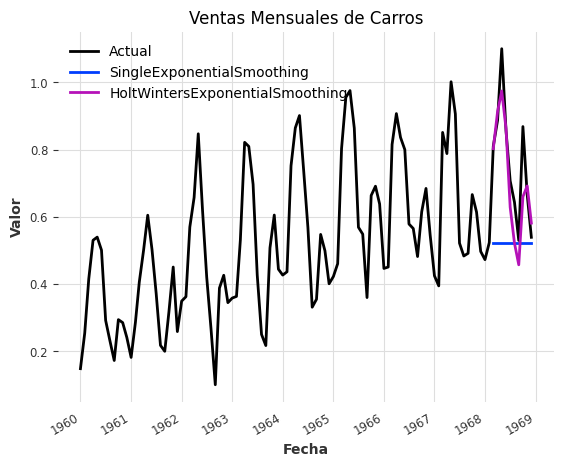

In [165]:
exponencial(ts_car, "Ventas Mensuales de Carros")

Con Alisamiento Exponencial se pudo observar lo siguiente:
- El dataset de Temperatura Promedio Mensual sí presenta estacionalidad (estaciones climáticas del año). Por tal razón, el método de Holt Winters Exponential Smoothing fue capaz de adaptarse correctamente a los datos y predecir correctamente los valores futuros. En este caso, con un error casi nulo (0.061 de RMSE y 0.045 de MAE). Este método obtuvo el error más bajo para este dataset hasta el momento.

- Nuevamente, debido a que el dataset presenta estacionalidad, el método de Single Exponential Smoothing no logró obtener estos buenos resultados. 

RMSE (SingleExponentialSmoothing): 0.42325334569911677
MAE (SingleExponentialSmoothing): 0.36174242242211035

RMSE (HoltWintersExponentialSmoothing): 0.061938806955279625
MAE (HoltWintersExponentialSmoothing): 0.04576386494318561


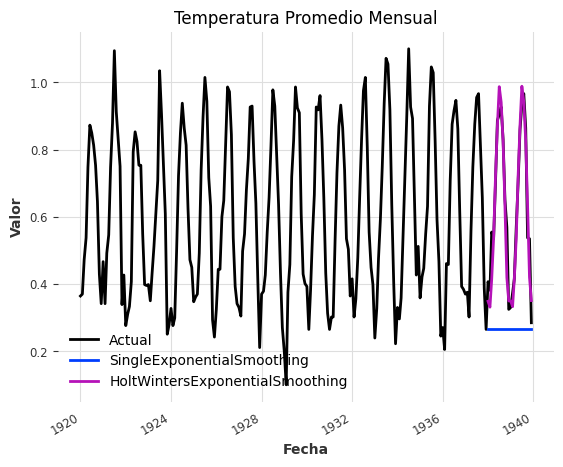

In [166]:
exponencial(ts_temperature, "Temperatura Promedio Mensual")

Con Alisamiento Exponencial se pudo observar lo siguiente:
- El dataset de Ventas Mensuales de Shampoo no tiene estacionalidad. Por tal razón, el método de Exponential Smoothing no presentó resultados tan buenos como en los otros datasets. Sin embargo, sí fue capaz de predecir los valores futuros de forma parecida a los métodos de promedio. 

- Single Exponential Smoothing presentó un error similar a Holt Winters Exponential Smoothing. Sin embargo, este método no es tan bueno como el otro debido a que no toma en cuenta la tendencia de los datos.

RMSE (SingleExponentialSmoothing): 0.1341992953641558
MAE (SingleExponentialSmoothing): 0.12534693407815467

RMSE (HoltWintersExponentialSmoothing): 0.12495609529742709
MAE (HoltWintersExponentialSmoothing): 0.11402605394354433


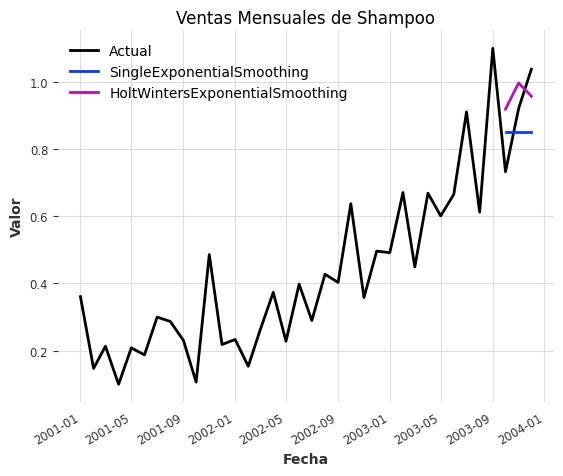

In [167]:
exponencial(ts_shampoo, "Ventas Mensuales de Shampoo")

---------
### Prophet
- Utilizar Prophet para modelar la serie de tiempo.

Nuevamente, se generó una función para aplicar el método de Prophet. Luego, se calculó el error de cada una de las predicciones. 

In [168]:
from darts.models.forecasting.prophet_model import Prophet

def prophet(ts, text, N=0):
    N = int(len(ts)*0.1)
    train, val = ts[:-N], ts[-N:]

    # Crear el modelo
    model = Prophet()

    # Entrenar el modelo
    model.fit(train)

    # Predecir los valores
    prediction = model.predict(len(val))

    # Error RMSE, MAE
    rmse_score = rmse(val, prediction)
    mae_score = mae(val, prediction)
    print("RMSE (Prophet):", rmse_score)
    print("MAE (Prophet):", mae_score)
    metrics[text]["Prophet"] = [rmse_score, mae_score]

    # Crear la gráfica de serie de tiempo
    fig, ax = plt.subplots()
    ts.plot(label='Actual', ax=ax)
    prediction.plot(label='Prediccion', ax=ax)

    ax.set_title(text)
    ax.set_xlabel("Fecha")
    ax.set_ylabel("Valor")
    ax.legend()
    plt.show()

Al utilizar Prophet con el dataset de Nacimientos Diarios, se pudo observar lo siguiente:
- El método fue capaz de predecir los valores con cierto error. Sin embargo, Prophet funciona mejor cuando hay estacionalidad y tendencia. Por tal razón, el error era esperado. 

- El error es parecido al de Holt Winters Exponential Smoothing y los métodos de promedio

13:56:27 - cmdstanpy - INFO - Chain [1] start processing


13:56:27 - cmdstanpy - INFO - Chain [1] done processing


RMSE (Prophet): 0.14039171656450322
MAE (Prophet): 0.11811191141894743


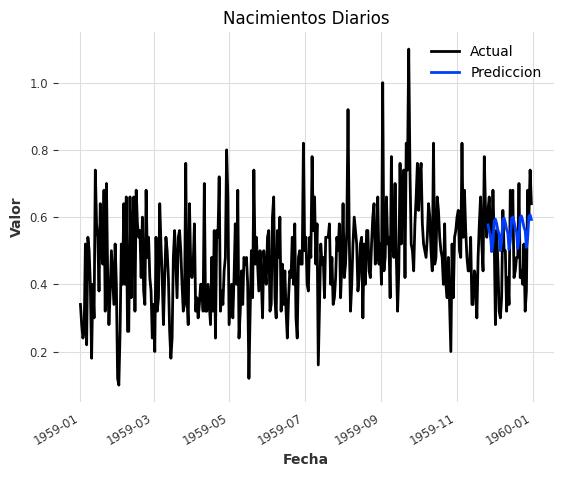

In [169]:
prophet(ts_births, "Nacimientos Diarios")

Al utilizar Prophet con el dataset de Ventas Mensuales de Carros, se pudo observar lo siguiente:
- Debido a que el dataset cuenta con estacionalidad y tendencia, este modelo fue capaz de predecir muy cercanamente los valores de ventas. Cabe destacar que con Holt Winters Exponential Smoothing se obtuvo un error más bajo. 

- Posiblemente Holt Winter presentó mejores resultados debido a los patrones irregularess vistos en la segunda mitad de cada año. Holt Winters es más flexible para adaptarse a estos patrones. 

13:56:27 - cmdstanpy - INFO - Chain [1] start processing


13:56:28 - cmdstanpy - INFO - Chain [1] done processing


RMSE (Prophet): 0.09604654501072314
MAE (Prophet): 0.07072187443256672


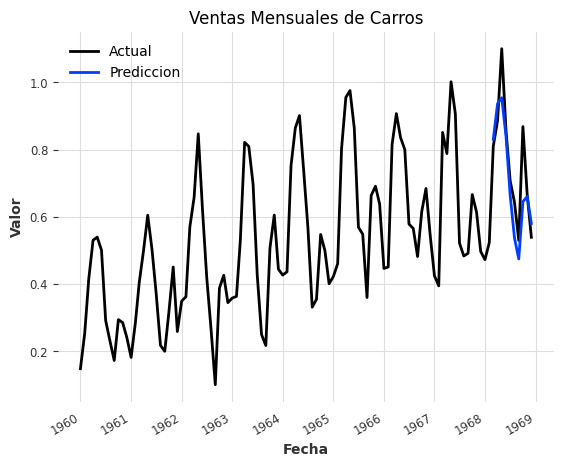

In [170]:
prophet(ts_car, "Ventas Mensuales de Carros")

Al utilizar Prophet con el dataset de Temperatura Promedio Mensual, se pudo observar lo siguiente:
- El algoritmo de Prophet sacó buenos resultados debido a que el presente dataset cuenta con estacionalidad. Sacó un error muy bajo, más bajo que el de Holt Winters Exponential Smoothing. Posiblemente la falta de tendencia permitió que el algoritmo pudiera predecir de forma más fácil.

13:56:28 - cmdstanpy - INFO - Chain [1] start processing
13:56:28 - cmdstanpy - INFO - Chain [1] done processing


RMSE (Prophet): 0.060832669715737954
MAE (Prophet): 0.043702303833785316


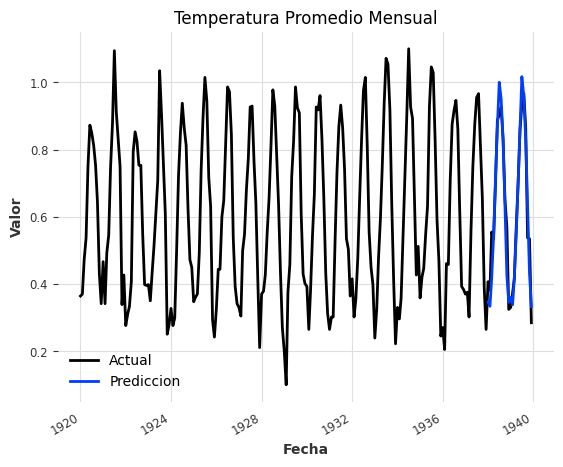

In [171]:
prophet(ts_temperature, "Temperatura Promedio Mensual")

Al utilizar Prophet con el dataset de Ventas Mensuales de Shampoo, se pudo observar lo siguiente:
- Se obtuvo un error muy grande debido a que el presente dataset no cuenta con estacionalidad. Por tal razón, el método no fue capaz de trabajar de manera óptima.

13:56:29 - cmdstanpy - INFO - Chain [1] start processing


13:56:29 - cmdstanpy - INFO - Chain [1] done processing


RMSE (Prophet): 0.41541369542082607
MAE (Prophet): 0.3336851330062378


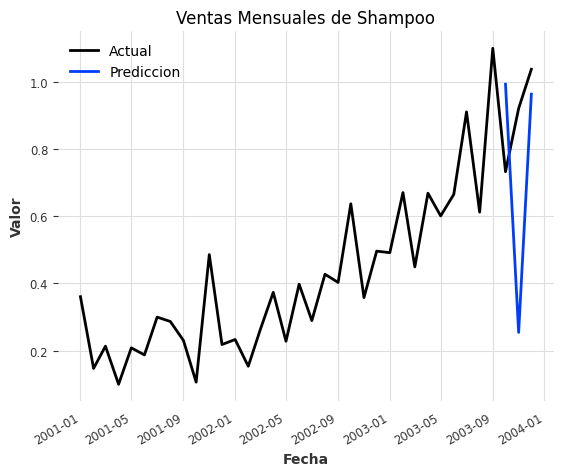

In [172]:
prophet(ts_shampoo, "Ventas Mensuales de Shampoo")

---------
### Redes Neuronales
- Implementar una red neuronal simple para prever la serie de tiempo

Finalmente, se generó una función para separar los datos, así como una red neuronal simple. 

In [209]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import Dense, BatchNormalization, GaussianDropout
from keras import regularizers
from keras.layers import Dense, Dropout, LeakyReLU, PReLU, ELU
from keras.layers import Activation
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Separa los datos a partir de una fecha
def date_split(ts, N=0.1):
    N = int(len(ts)*N)
    train, val = ts[:-N], ts[-N:]

    return train.values(), val.values()

# Crea las secuencias para el entrenamiento y prueba de la red neuronal
def create_sequences(data, time_steps):
    sequences = []
    for i in range(len(data) - time_steps):
        sequence = data[i:i+time_steps]
        target = data[i+time_steps]
        sequences.append((sequence, target))
    return sequences


def red_simple(ts, X_train, y_train, X_test, y_test, text):
    time_steps = len(X_train[0])

    model_ffnn = Sequential([
        Dense(64, activation='relu', input_shape=(time_steps,)),
        Dense(32, activation='relu'),
        Dense(1)
    ])

    model_ffnn.compile(optimizer='adam', loss='mean_squared_error')

    history_ffnn = model_ffnn.fit(X_train, y_train, epochs=20, batch_size=16, verbose=0)
    predictions = model_ffnn.predict(X_test)

    prediction_ffnn = predictions.flatten()

    # RMSE y MAE
    rmse_score = np.sqrt(mean_squared_error(y_test, prediction_ffnn))
    mae_score = mean_absolute_error(y_test, prediction_ffnn)

    print("RMSE (FFNN):", rmse_score)
    print("MAE (FFNN):", mae_score)
    metrics[text]["FFNN"] = [rmse_score, mae_score]

    # Crear la gráfica de serie de tiempo
    fig, ax = plt.subplots()
    ts.plot(label='Actual', ax=ax)
    ax.plot(ts.time_index[-len(y_test):], prediction_ffnn, label='Prediccion', color='orange')

    ax.set_title(text)
    ax.set_xlabel("Fecha")
    ax.set_ylabel("Valor")

    ax.legend()
    plt.show()

Al utilizar una Red Neuronal Simple con el dataset de Nacimientos Diarios se pudo observar lo siguiente:
- Debido a que el dataset no presenta estacionalidad ni tendencia, la red neuronal no fue capaz de predecir los valores futuros con bajo error. Esto especialmente considerando que redes neuronales simples no son muy buenas para predecir series de tiempo, especialmente cuando no hay estacionalidad ni tendencia.

- El error es parecido al de los otros métodos.

1/1 [==============================] - 0s 68ms/step
RMSE (FFNN): 0.13755923998938743
MAE (FFNN): 0.11462639817824731


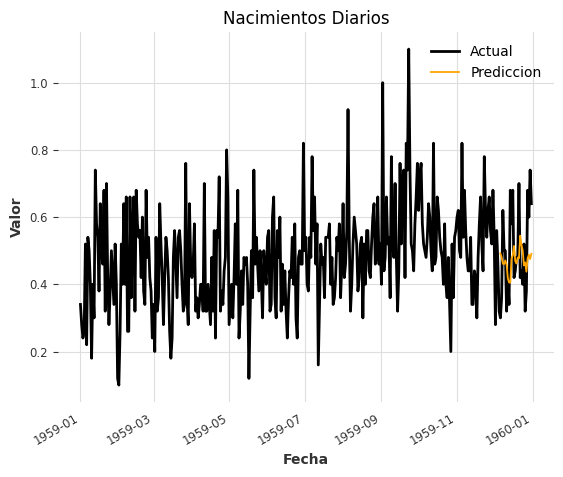

In [210]:
train, val = date_split(ts_births)
training_sequences = create_sequences(train, 10)
testing_sequences = create_sequences(val, 10)

# Crea los arreglos de entrenamiento y prueba
X_train = np.array([sequence for sequence, target in training_sequences])
y_train = np.array([target for sequence, target in training_sequences])
X_test = np.array([sequence for sequence, target in testing_sequences])
y_test = np.array([target for sequence, target in testing_sequences])

X_train = X_train.reshape(-1, 10, 1)
X_test = X_test.reshape(-1, 10, 1)

red_simple(ts_births, X_train, y_train, X_test, y_test, "Nacimientos Diarios")

Al utilizar una Red Neuronal Simple con el dataset de Ventas Mensuales de Carros se pudo observar lo siguiente:
- La Red Neuronal logró identificar cierto patrón en los datos. Sin embargo, el dataset cuenta con picos y tendencias extrañas en ciertos puntos. Por tal razón, la red neuronal no fue capaz de predecir los valores futuros con bajo error. Nuevamente, considerando que redes neuronales simples solamente son buenas para predecir series de tiempo que tienen patrónes claros.

1/1 [==============================] - 0s 76ms/step
RMSE (FFNN): 0.14200276144493748
MAE (FFNN): 0.13328075883151158


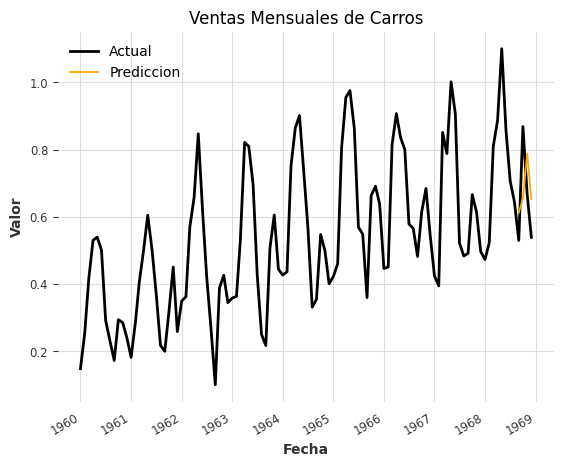

In [211]:
train, val = date_split(ts_car)
training_sequences = create_sequences(train, 6)
testing_sequences = create_sequences(val, 6)

# Crea los arreglos de entrenamiento y prueba
X_train = np.array([sequence for sequence, target in training_sequences])
y_train = np.array([target for sequence, target in training_sequences])
X_test = np.array([sequence for sequence, target in testing_sequences])
y_test = np.array([target for sequence, target in testing_sequences])

X_train = X_train.reshape(-1, 6, 1)
X_test = X_test.reshape(-1, 6, 1)

red_simple(ts_car, X_train, y_train, X_test, y_test, "Ventas Mensuales de Carros")

Al utilizar una Red Neuronal Simple con el dataset de Temperatura Promedio Mensual se pudo observar lo siguiente:
- El dataset de temperatura es el que tiene un patrón más claro. Por tal razón, la red neuronal fue capaz de predecir los valores futuros con bajo error. Posiblemente la falta de tendencia le permitió a la red entender el patrón de estacionalidad facilmente para así realizar las predicciones. 

- Este dataset ha sido el que mejores resultados ha tenido con redes neuronales simples hasta el momento.

1/1 [==============================] - 0s 51ms/step
RMSE (FFNN): 0.05836594586795166
MAE (FFNN): 0.04148293453635595


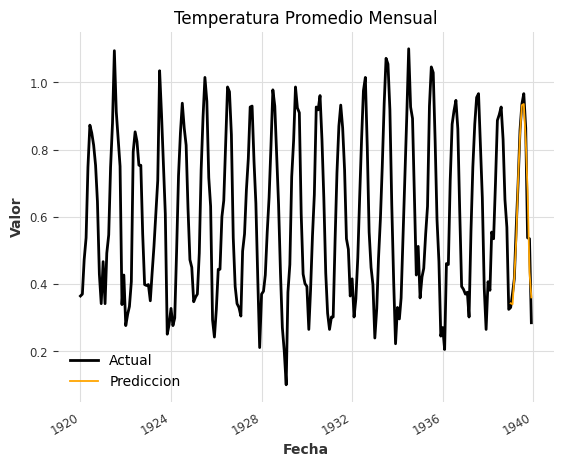

In [212]:
train, val = date_split(ts_temperature)
training_sequences = create_sequences(train, 12)
testing_sequences = create_sequences(val, 12)

# Crea los arreglos de entrenamiento y prueba
X_train = np.array([sequence for sequence, target in training_sequences])
y_train = np.array([target for sequence, target in training_sequences])
X_test = np.array([sequence for sequence, target in testing_sequences])
y_test = np.array([target for sequence, target in testing_sequences])

X_train = X_train.reshape(-1, 12, 1)
X_test = X_test.reshape(-1, 12, 1)

red_simple(ts_temperature, X_train, y_train, X_test, y_test, "Temperatura Promedio Mensual")

Al utilizar una Red Neuronal Simple con el dataset de Ventas Mensuales de Shampoo se pudo observar lo siguiente:
- El dataset presenta una tendencia. Sin embargo, cuenta con escalones y picos extraños. Por tal razón, la red neuronal no fue capaz de predecir los valores futuros con bajo error. Nuevamente, considerando que redes neuronales simples solamente son buenas para predecir series de tiempo que tienen patrónes claros.

- A pesar de esto, la red neuronal logró predecir los valores futuros con un error menor que los métodos de promedio.

1/1 [==============================] - 0s 48ms/step
RMSE (FFNN): 0.1539837664218758
MAE (FFNN): 0.13732472324013315


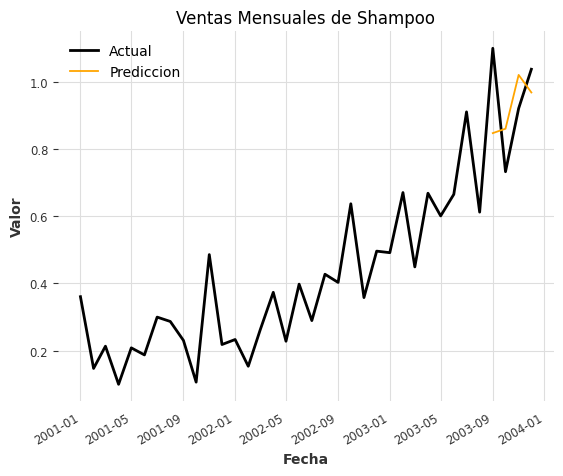

In [219]:
train, val = date_split(ts_shampoo, 0.4)
training_sequences = create_sequences(train, 10)
testing_sequences = create_sequences(val, 10)

# Crea los arreglos de entrenamiento y prueba
X_train = np.array([sequence for sequence, target in training_sequences])
y_train = np.array([target for sequence, target in training_sequences])
X_test = np.array([sequence for sequence, target in testing_sequences])
y_test = np.array([target for sequence, target in testing_sequences])

X_train = X_train.reshape(-1, 10, 1)
X_test = X_test.reshape(-1, 10, 1)

red_simple(ts_shampoo, X_train, y_train, X_test, y_test, "Ventas Mensuales de Shampoo")

--------
### Comparación y Evaluación

In [220]:
dfs = {}
for key, value in metrics.items():
    dfs[key] = pd.DataFrame(value).T
    dfs[key].columns = ['RMSE', 'MAE']

    #ordenar por RMSE y MAE
    dfs[key] = dfs[key].sort_values(by=['RMSE', 'MAE'])
    

for key, df in dfs.items():
    print(key)
    print(df)
    print()

Nacimientos Diarios
                                     RMSE       MAE
Sarima                           0.130546  0.111836
SingleExponentialSmoothing       0.131572  0.112762
HoltWintersExponentialSmoothing  0.132394  0.111954
NaiveMean                        0.133104  0.112739
NaiveMovingAverage               0.134990  0.115556
FFNN                             0.137559  0.114626
Prophet                          0.140392  0.118112

Ventas Mensuales de Carros
                                     RMSE       MAE
HoltWintersExponentialSmoothing  0.094266  0.071541
Prophet                          0.096047  0.070722
FFNN                             0.142003  0.133281
Sarima                           0.243660  0.194994
NaiveMovingAverage               0.290989  0.237529
SingleExponentialSmoothing       0.290989  0.237529
NaiveMean                        0.295715  0.243295

Temperatura Promedio Mensual
                                     RMSE       MAE
FFNN                             0.058

--------
### Conclusiones

--------
### Pasos a seguir, mejoras y recomendaciones